1.Quais são as 10 cidades com maior quantidade de unicórnios e seus respectivos valores?

2.Quais são os fundos que mais investiram em startups?

3.Quais são os 10 principais setores industriais com unicórnios considerando seus valores?

4.Quais empresas de unicórnios tiveram o maior retorno sobre o investimento?

5.Quanto tempo geralmente leva para uma empresa se tornar um unicórnio? Tem sempre sido desse jeito?

6.Quais países têm mais unicórnios? Existem cidades que parecem ser centros industriais?

7.Quais investidores financiaram mais unicórnios?

8.Se você fosse financiar 5 startups, quais seriam? Justifique seu racional

9.Se você fosse trabalhar em um fundo, quais seriam suas 3 principais opções? Justifique seu racional

In [3]:
# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Ler Base de Dados
df = pd.read_csv(r'C:\Users\RAFAEL PANEGASSI\OneDrive\Área de Trabalho\PORTFOLIO\CASE UNICORNIOS\Unicorn_Companies.csv')

In [6]:
#Verificar dimensão
df.shape

(1074, 10)

In [7]:
# Verificar tipos
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [8]:
# Verificar disposição dos dados
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [9]:
# Verificar Campos Nulos
df.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [10]:
# Excluir Linhas Nulas direto na base de dados
df.dropna(inplace=True)

In [11]:
# Confirmando linhas excluidas
df.shape

(1057, 10)

In [12]:
# Colunas
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [13]:
# Renomear colunas
df.rename( columns={
    'Company' : 'Empresa',
    'Valuation' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
    'Year Founded' : 'Ano Fundado',
    'Funding' : 'Investimento Inicial',
    'Continent' : 'Continente'
}, inplace=True )
df.head()

,Empresa,Valor ($),Data de Adesão,Setor,Cidade,Pais,Continente,Ano Fundado,Investimento Inicial,Investidores
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [14]:
#Transformando data de adesão para tipo data
df['Data de Adesão'] = pd.to_datetime( df['Data de Adesão'] )
df['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2011-12-12
Name: Data de Adesão, dtype: datetime64[ns]

In [15]:
#Transformando ano fundado para tipo inteiro
df['Ano Fundado'] = df['Ano Fundado'].replace('None',np.nan)
df['Ano Fundado'] = df['Ano Fundado'].astype('int')
df['Ano Fundado'].head()

0    2012
1    2002
2    2008
3    2010
4    2005
Name: Ano Fundado, dtype: int32

In [16]:
# Criar coluna do ano da data de adesão
df['Ano de adesão'] = df['Data de Adesão'].dt.year

In [20]:
#Transformando Coluna Valor ($)
df['Valor ($)'] = df['Valor ($)'].replace({'\$': ''}, regex=True)
df['Valor ($)'] = df['Valor ($)'].replace({'B': '000000000'}, regex=True)
df['Valor ($)'] = df['Valor ($)'].astype(float)
df.head()

,Empresa,Valor ($),Data de Adesão,Setor,Cidade,Pais,Continente,Ano Fundado,Investimento Inicial,Investidores,Ano de adesão
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000000000,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7000000000,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2000000000,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2000000000,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4000000000,"Institutional Venture Partners, Sequoia Capita...",2011


In [21]:
#Transformando Investimento Inicial ($)
df['Investimento Inicial'] = df['Investimento Inicial'].replace({'\$': ''}, regex=True)
df['Investimento Inicial'] = df['Investimento Inicial'].replace({'B': '000000000'}, regex=True)
df['Investimento Inicial'] = df['Investimento Inicial'].replace({'M': '000000'}, regex=True)
df['Investimento Inicial'] = df['Investimento Inicial'].replace({'Unknown': '0'}, regex=True)
df['Investimento Inicial'] = df['Investimento Inicial'].astype(float)

In [23]:
# Verificando tipos de dados novamente
df.dtypes

Empresa                         object
Valor ($)                      float64
Data de Adesão          datetime64[ns]
Setor                           object
Cidade                          object
Pais                            object
Continente                      object
Ano Fundado                      int32
Investimento Inicial           float64
Investidores                    object
Ano de adesão                    int64
dtype: object

In [24]:
# Quais são as 10 cidades com maior quantidade de unicórnios e seus respectivos valores?
Analise01 = df.groupby(by=['Cidade']).agg({'Empresa':['count'],'Valor ($)':['sum']})
Analise01 = Analise01.sort_values([('Empresa','count')], ascending=False)[:10]
Analise01

,Empresa,Valor ($)
,count,sum
Cidade,,
San Francisco,152,7.240000e+11
New York,103,2.330000e+11
Beijing,63,3.480000e+11
Shanghai,43,9.800000e+10
London,34,1.780000e+11
Bengaluru,29,1.070000e+11
Paris,19,4.900000e+10
Shenzhen,19,1.410000e+11


In [25]:
# Separar investidores
df[['Investidor 1', 'Investidor 2', 'Investidor 3', 'Investidor 4']] = df['Investidores'].str.split(',', expand=True)
Investidor_1 = df['Investidor 1'].value_counts()
Investidor_2 = df['Investidor 2'].value_counts()
Investidor_3 = df['Investidor 3'].value_counts()
Investidor_4 = df['Investidor 4'].value_counts()

In [26]:
# Quais investidores financiaram mais unicórnios?
col1 = df['Investidor 1'].str.strip()
col2 = df['Investidor 2'].str.strip()
col3 = df['Investidor 3'].str.strip()
col4 = df['Investidor 4'].str.strip()
t1 = col1.append(col2)
t2 = t1.append(col3)
t3 = t2.append(col4)
t3.value_counts()[:5]


Accel                      59
Tiger Global Management    52
Andreessen Horowitz        52
Insight Partners           47
Sequoia Capital China      46
dtype: int64

In [27]:
# Quais são os fundos que mais investiram em startups? (Valor)
Analise02 = df.groupby(by=['Investidores']).agg({'Investimento Inicial':['sum']})
Analise02 = Analise02.sort_values([('Investimento Inicial','sum')], ascending=False)[:10]
Analise02

,Investimento Inicial
,sum
Investidores,
Tiger Global Management,1.400000e+10
"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",8.000000e+09
"Tencent Holdings, KKR, Smash Ventures",7.000000e+09
"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",7.000000e+09
"Accel India, SAIF Partners, Norwest Venture Partners",5.000000e+09
"Hillhouse Capital Management, Boyu Capital, Sequoia Capital China",5.000000e+09
"Aviation Industry Corporation of China, Essence Financial, Jiangsu Sha Steel Group",5.000000e+09
"KKR, Tencent Holdings, Sequoia Capital China",5.000000e+09


In [28]:
# Quais são os fundos que mais investiram em startups? (Quantidade)
Analise02_1 = df.groupby(by=['Investidores']).agg({'Empresa':['count']})
Analise02_1 = Analise02_1.sort_values([('Empresa','count')], ascending=False)[:10]
Analise02_1

,Empresa
,count
Investidores,
Sequoia Capital,3
"Speedinvest, Valar Ventures, Uniqa Ventures",2
"Global Founders Capital, Shea Ventures, Greycroft",2
"Qualcomm Ventures, Accel, Canaan Partners",2
"Tiger Global Management, Sequoia Capital India, Ribbit Capital",2
General Atlantic,2
"Greylock Partners, Google Ventures, BlackRock",2
"Sequoia Capital China, Qiming Venture Partners, Tencent Holdings",2


In [29]:
# Quais são os 10 principais setores industriais com unicórnios considerando Valuation?
Analise03 = df.groupby(by=['Setor']).agg({'Empresa':['count'],'Valor ($)':['sum']})
Analise03 = Analise03.sort_values([('Empresa','count')], ascending=False)[:10]
Analise03

,Empresa,Valor ($)
,count,sum
Setor,,
Fintech,218,8.430000e+11
Internet software & services,203,5.930000e+11
E-commerce & direct-to-consumer,107,4.200000e+11
Health,74,1.980000e+11
Artificial intelligence,71,3.560000e+11
Other,58,2.520000e+11
"Supply chain, logistics, & delivery",56,1.750000e+11
Cybersecurity,50,1.290000e+11


In [30]:
# Criar coluna do retorno do investimento
df['Retorno do investimento'] = (df['Valor ($)'] - df['Investimento Inicial'])/df['Investimento Inicial']
df['ROI'] = df['Retorno do investimento'].sort_values(ascending=False).replace({np.inf: '0'}, regex=True).astype(float)


In [31]:
# Quais empresas de unicórnios tiveram o maior retorno sobre o investimento?
cols = ['Empresa','Valor ($)','ROI']
Analise04 = df.loc[:,cols]
Analise04.sort_values('ROI', ascending=False)[:10].reset_index()

,index,Empresa,Valor ($),ROI
0,239,Zapier,4.000000e+09,3999.000000
1,61,Dunamu,9.000000e+09,125.760563
2,792,Workhuman,1.000000e+09,110.111111
3,361,CFGI,2.000000e+09,104.263158
4,743,Manner,1.000000e+09,99.000000
5,72,DJI Innovations,8.000000e+09,75.190476
6,760,GalaxySpace,1.000000e+09,70.428571
7,5,Canva,4.000000e+10,68.930070
8,368,Il Makiage,2.000000e+09,67.965517
9,1012,Revolution Precrafted,1.000000e+09,65.666667


In [32]:
# Criar coluna de tempo para se tornar um unicornio em anos
df['Tempo Unicornio'] = df['Ano de adesão'] - df['Ano Fundado']
df['Tempo Unicornio'].sort_values().astype(float)

714     -4.0
314      0.0
396      0.0
161      0.0
1001     0.0
        ... 
840     27.0
1043    28.0
699     37.0
373     37.0
189     98.0
Name: Tempo Unicornio, Length: 1057, dtype: float64

In [33]:
# Empresa com dados errados ( Ano que virou unicornio antes do ano em que foi fundada)
df[df['Tempo Unicornio']<0]
df.loc[df['Empresa']=='Yidian Zixun','Ano Fundado']=2013
df.loc[df['Empresa']=='Yidian Zixun','Tempo Unicornio']=4# Empresa com dados errados ( Ano que virou unicornio antes do ano em que foi fundada)
df[df['Tempo Unicornio']<0]
df.loc[df['Empresa']=='Yidian Zixun','Ano Fundado']=2013
df.loc[df['Empresa']=='Yidian Zixun','Tempo Unicornio']=4

In [34]:
# Quanto tempo geralmente leva para uma empresa se tornar um unicórnio? Tem sempre sido desse jeito?
print(df['Tempo Unicornio'].mean())
print(df['Tempo Unicornio'].median())

7.027436140018922
6.0


<AxesSubplot:xlabel='Tempo Unicornio', ylabel='Count'>

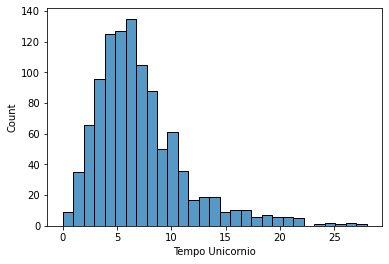

In [35]:
sns.histplot(df[df['Tempo Unicornio']<30]['Tempo Unicornio'])

In [36]:
# Quais países têm mais unicórnios? Existem cidades que parecem ser centros industriais?
Analise05 = df.groupby(by=['Pais','Cidade']).agg({'Empresa':['count'],'Valor ($)':['sum']})
Analise05 = Analise05.sort_values([('Empresa','count')], ascending=False)[:10]
Analise05

Empresa     Valor ($)
                               count           sum
Pais           Cidade                             
United States  San Francisco     152  7.240000e+11
               New York          103  2.330000e+11
China          Beijing            63  3.480000e+11
               Shanghai           43  9.800000e+10
United Kingdom London             34  1.780000e+11
India          Bengaluru          29  1.070000e+11
France         Paris              19  4.900000e+10
China          Shenzhen           19  1.410000e+11
United States  Palo Alto          18  5.300000e+10
Germany        Berlin             17  4.100000e+10

In [37]:
# Se você fosse financiar 5 startups, quais seriam? Justifique seu racional
df['Score'] = (df['Valor ($)'] * df['ROI'])
df.sort_values('Score', ascending=False).reset_index()[:10]

,index,Empresa,Valor ($),Data de Adesão,Setor,Cidade,Pais,Continente,Ano Fundado,Investimento Inicial,Investidores,Ano de adesão,Investidor 1,Investidor 2,Investidor 3,Investidor 4,Retorno do investimento,ROI,Tempo Unicornio,Score
0,239,Zapier,4.000000e+09,2021-01-14,Internet software & services,Sunnyvale,United States,North America,2011,1.000000e+06,"Sequoia Capital, Bessemer Venture Partners, Th...",2021,Sequoia Capital,Bessemer Venture Partners,Threshold Ventures,None,3999.000000,3999.000000,10,1.599600e+13
1,2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",2018,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None,49.000000,49.000000,10,4.900000e+12
2,3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",2014,Khosla Ventures,LowercaseCapital,capitalG,None,46.500000,46.500000,4,4.417500e+12
3,0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,21.500000,21.500000,5,3.870000e+12
4,5,Canva,4.000000e+10,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,5.720000e+08,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None,68.930070,68.930070,6,2.757203e+12
5,1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None,13.285714,13.285714,10,1.328571e+12
6,61,Dunamu,9.000000e+09,2021-07-22,Fintech,Seoul,South Korea,Asia,2012,7.100000e+07,"Qualcomm Ventures, Woori Investment, Hanwha In...",2021,Qualcomm Ventures,Woori Investment,Hanwha Investment & Securities,None,125.760563,125.760563,9,1.131845e+12
7,6,Checkout.com,4.000000e+10,2019-05-02,Fintech,London,United Kingdom,Europe,2012,2.000000e+09,"Tiger Global Management, Insight Partners, DST...",2019,Tiger Global Management,Insight Partners,DST Global,None,19.000000,19.000000,7,7.600000e+11
8,18,Miro,1.800000e+10,2022-01-05,Internet software & services,San Francisco,United States,North America,2011,4.760000e+08,"Accel, AltaIR Capital, Technology Crossover Ve...",2022,Accel,AltaIR Capital,Technology Crossover Ventures,None,36.815126,36.815126,11,6.626723e+11
9,72,DJI Innovations,8.000000e+09,2015-01-23,Hardware,Shenzhen,China,Asia,2006,1.050000e+08,"Accel Partners, Sequoia Capital",2015,Accel Partners,Sequoia Capital,None,None,75.190476,75.190476,9,6.015238e+11
